In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.pyplot import figure
from scipy import stats
from scipy.stats import norm
import missingno as msno
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [4]:
test_data = pd.read_csv('/content/drive/MyDrive/cse303paper/test.csv')
train_data = pd.read_csv('/content/drive/MyDrive/cse303paper/train.csv')

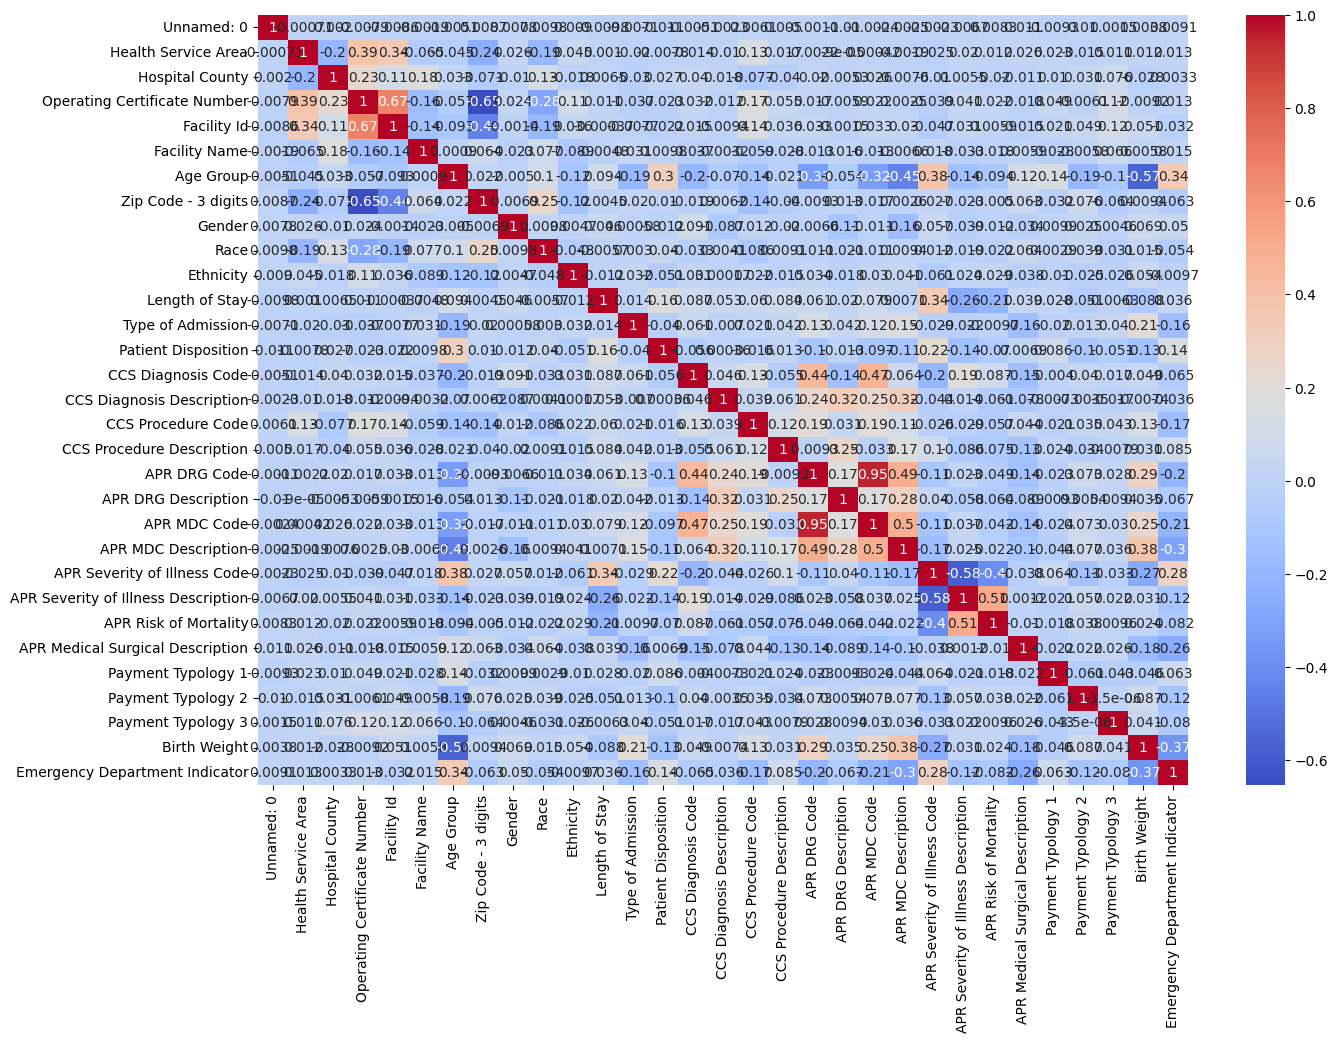

In [11]:
import matplotlib.pyplot as plt
figure(figsize=(15, 10))
sns.heatmap(test_data.corr(), annot=True, cmap="coolwarm")
plt.show()

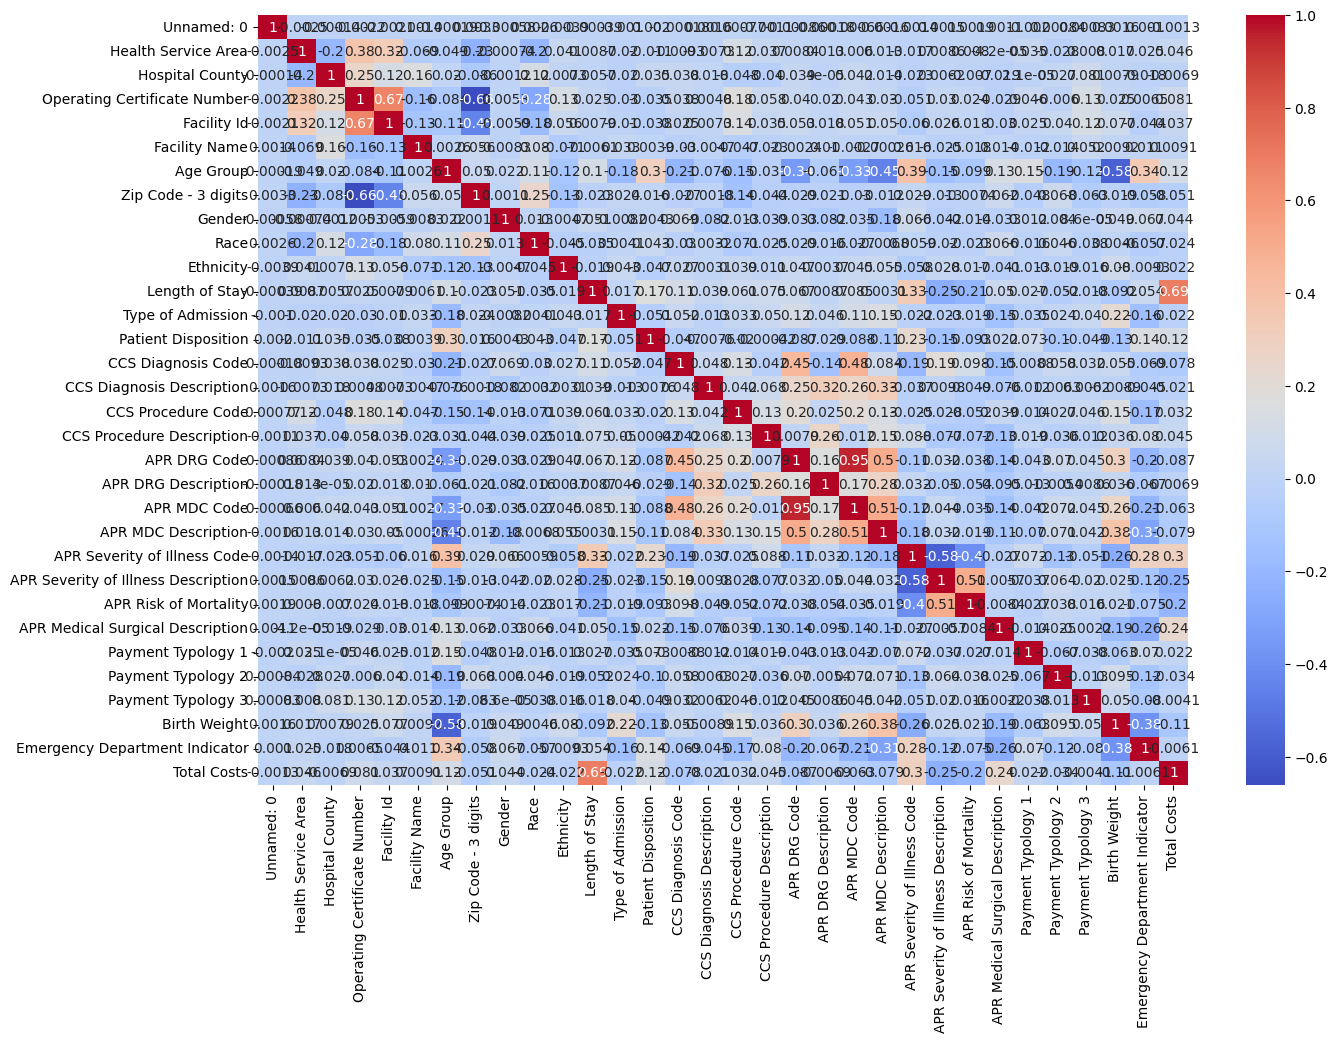

In [10]:
import matplotlib.pyplot as plt
figure(figsize=(15, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
plt.show()


In [5]:
Y_train = np.asarray(train_data['Total Costs'])
X_train = np.asarray(train_data.iloc[:, 1:-1])
X_test = np.asarray(test_data.iloc[:, 1:])


In [7]:
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)


In [9]:
linear_model.fit(X_train, Y_train)
tree_model.fit(X_train, Y_train)
forest_model.fit(X_train, Y_train)
gb_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)


KNeighborsRegressor()

In [10]:
Y_pred_linear = linear_model.predict(X_test)
print(Y_pred_linear)

[19657.33339912 23073.8312253  43489.3770994  ... -1188.76058525
 12060.31794149  3659.86706478]


In [11]:
Y_pred_tree = tree_model.predict(X_test)
print(Y_pred_tree)

[43617.7   20761.94  47233.1   ...  1848.63   5480.68   6903.365]


In [12]:
Y_pred_forest = forest_model.predict(X_test)
print(Y_pred_forest)

[44613.1148     20502.1903     51002.936      ...  2115.7772
  9147.8531      6853.66946667]


In [13]:
Y_pred_gb = gb_model.predict(X_test)
print(Y_pred_gb)

[22729.80611192 21001.57300754 48011.55746786 ...  3352.36602368
 11225.26236109  5369.25186696]


In [14]:
Y_pred_knn = knn_model.predict(X_test)
print(Y_pred_knn)

[48985.452 17821.928 48151.376 ...  4481.8    5548.376  6179.288]


In [15]:
linear_train_pred = linear_model.predict(X_train)
tree_train_pred = tree_model.predict(X_train)
forest_train_pred = forest_model.predict(X_train)
gbr_train_pred = gb_model.predict(X_train)
knn_train_pred = knn_model.predict(X_train)

In [16]:
linear_mse = mean_squared_error(Y_train, linear_train_pred)
tree_mse = mean_squared_error(Y_train, tree_train_pred)
forest_mse = mean_squared_error(Y_train, forest_train_pred)
gbr_mse = mean_squared_error(Y_train, gbr_train_pred)
knn_mse = mean_squared_error(Y_train, knn_train_pred)

linear_rmse = np.sqrt(linear_mse)
tree_rmse = np.sqrt(tree_mse)
forest_rmse = np.sqrt(forest_mse)
gbr_rmse = np.sqrt(gbr_mse)
knn_rmse = np.sqrt(knn_mse)

linear_mae = mean_absolute_error(Y_train, linear_train_pred)
tree_mae = mean_absolute_error(Y_train, tree_train_pred)
forest_mae = mean_absolute_error(Y_train, forest_train_pred)
gbr_mae = mean_absolute_error(Y_train, gbr_train_pred)
knn_mae = mean_absolute_error(Y_train, knn_train_pred)

liner_rsqr = r2_score(Y_train, linear_train_pred)
tree_rsqr = r2_score(Y_train, tree_train_pred)
forest_rsqr = r2_score(Y_train, forest_train_pred)
gbr_rsqr = r2_score(Y_train, gbr_train_pred)
knn_rsqr = r2_score(Y_train, knn_train_pred)


In [17]:
print("Linear Regression MSE:",linear_mse)
print("Decision Tree MSE:",tree_mse)
print("Random Forest MSE:",forest_mse )
print("Gradient Boosting MSE:",gbr_mse)
print("KNN MSE:",knn_mse)

Linear Regression MSE: 423020564.89626986
Decision Tree MSE: 113874.47076485532
Random Forest MSE: 29953436.405692212
Gradient Boosting MSE: 214538165.8653016
KNN MSE: 321533465.2486898


In [18]:
print("Linear Regression RMSE:", linear_rmse)
print("Decision Tree RMSE:", tree_rmse)
print("Random Forest RMSE:", forest_rmse)
print("Gradient Boosting RMSE:", gbr_rmse)
print("KNN RMSE:", knn_rmse)

Linear Regression RMSE: 20567.463744863388
Decision Tree RMSE: 337.45291636738796
Random Forest RMSE: 5472.97326922873
Gradient Boosting RMSE: 14647.121419081006
KNN RMSE: 17931.354250270386


In [19]:
print("Linear Regression RMSE:", linear_mae)
print("Decision Tree RMSE:", tree_mae)
print("Random Forest RMSE:", forest_mae)
print("Gradient Boosting RMSE:", gbr_mae)
print("KNN RMSE:", knn_mae)

Linear Regression RMSE: 7827.947384990677
Decision Tree RMSE: 27.378130096192614
Random Forest RMSE: 1371.7315885363491
Gradient Boosting RMSE: 5207.89902358375
KNN RMSE: 5404.411027432653


In [20]:
print("Linear Regression R²:",liner_rsqr)
print("Decision Tree R²:",tree_rsqr)
print("Random Forest R²:",forest_rsqr)
print("Gradient Boosting R²:",gbr_rsqr)
print("KNN R²:",knn_rsqr)

Linear Regression R²: 0.5566810172921373
Decision Tree R²: 0.9998806613230535
Random Forest R²: 0.9686092638091193
Gradient Boosting R²: 0.7751673338464333
KNN R²: 0.6630379216775519
